### Limits of Diversification

##### and the anatomy of cap-weighted portffolio and a bunch of cool Pandas stuff along the way

In [63]:
%load_ext autoreload 
%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import analysis_kit as ak

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
ind_return=ak.get_ind_returns()
ind_size= ak.get_ind_size()
ind_nfirms=ak.get_ind_nfirms()

In [65]:
ind_return.shape

(1110, 30)

In [66]:
ind_size.shape

(1110, 30)

In [67]:
ind_nfirms.shape

(1110, 30)

#### All three have the same number of rows and columns. This means we are set to go ahead.!

#### If we want to construct a market capitalization weighted index, first we need the market cap for each industry (i.e. 30) each month from 1926 to 2018

In [68]:
ind_mktcap=ind_size * ind_nfirms # Note that this is the average market cap for each industry each month starting at 01/1926

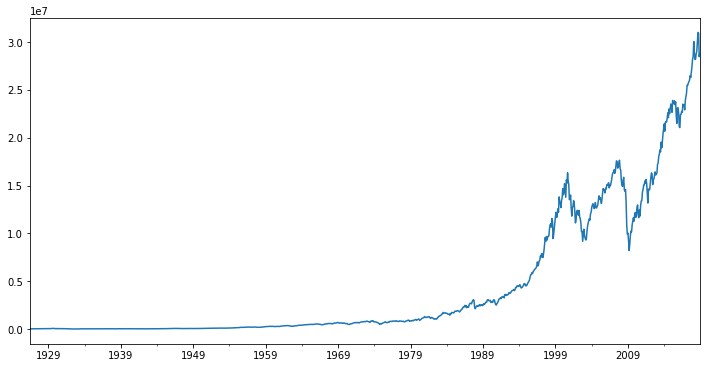

In [69]:
total_mktcap=ind_mktcap.sum(axis="columns") # This is adding up market cap values of each industry across the rows and plotting 
                                                                                # it
total_mktcap.plot(figsize=(12,6))

In [70]:
total_mktcap.head()

1926-07    26657.94
1926-08    27436.34
1926-09    28060.41
1926-10    28057.23
1926-11    27198.40
Freq: M, dtype: float64

#### But we are really after is the weights not the total market cap

All we have do to compute the weights is divide the industry market cap by the Total market cap at that point in time.

In [71]:
ind_capweight= ind_mktcap.divide(total_mktcap, axis="rows")

##### What the above code does is that it takes each industry's average market cap for each month and divides that by the Total Market Cap of the entire index

In [72]:
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


#### Check whether all the weights for each month in each industry add up to 1

In [73]:
ind_capweight.sum(axis="columns")

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
          ... 
2018-08    1.0
2018-09    1.0
2018-10    1.0
2018-11    1.0
2018-12    1.0
Freq: M, Length: 1110, dtype: float64

#### Similarly, we can also go ahead and compare how the weights of different industries have changed over time

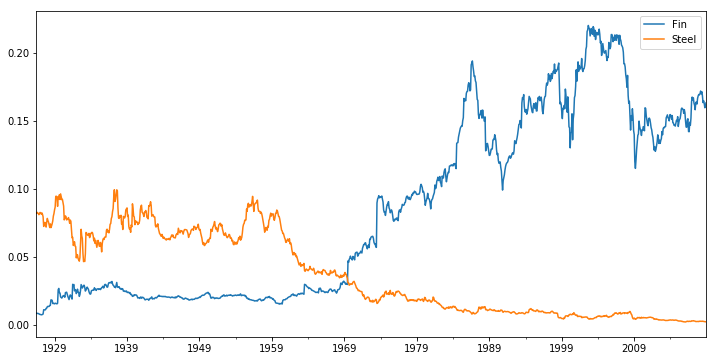

In [74]:
ind_capweight[["Fin","Steel"]].plot(figsize=(12,6)) # The diff between using a single sq. brackets and double sq. brackets is that
                                                    # the [] results in output that is of type "Series" whereas [[]] gives out
                                                    # a df.
                                                    # Furthermore, with [[]] we can select multiple columns from the DataFrame

#### Until now, we have got all the cap weights for the individual components in the entire market. With this, we can construct a cap-weighted market index just like the S&P 500.  

##### For that, first we need to compute the total market return. Note that the Total Market Return is nothing more than the weighted average of all the industry returns every month 

In [75]:
total_market_return= (ind_capweight * ind_return).sum(axis="columns")
total_market_return.head()

1926-07    0.031375
1926-08    0.028957
1926-09    0.005566
1926-10   -0.028504
1926-11    0.028039
Freq: M, dtype: float64

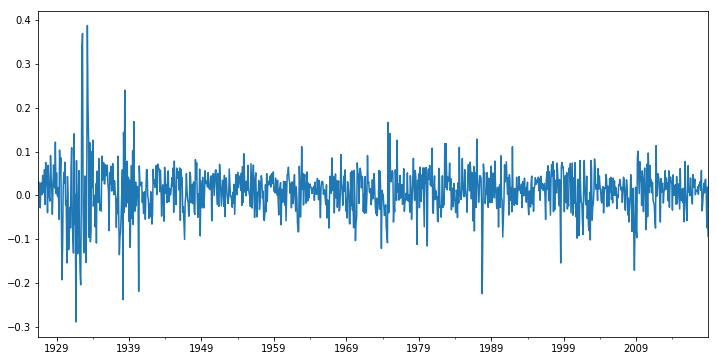

In [76]:
total_market_return.plot(figsize=(12,6))

#### Now, we shall take these returns and convert it into total market index. 

#### And, the total market index is nothing more than the wealth index derived from these above returns

In [77]:
total_market_index=ak.drawdown(total_market_return).Wealth

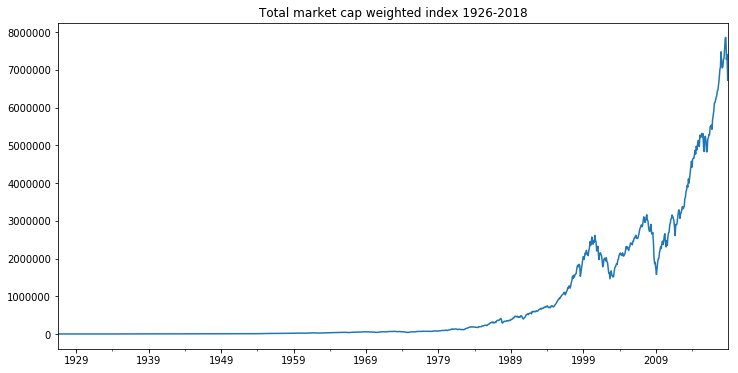

In [78]:
total_market_index.plot(figsize=(12,6), title="Total market cap weighted index 1926-2018")

#### SO now, what do we want to do? I mean what is our end game here?

###### Well, first we wanna look at the returns of the market over the 3 years look-back period. IOW, we wanna look at how returns of the specific industry is related to market correlations. 
###### Hence, we shall first compute and plot the 36 months trailing index

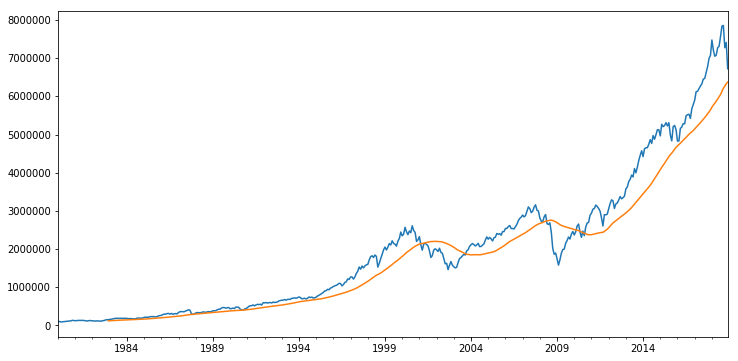

In [79]:
total_market_index["1980":].plot(figsize=(12,6))
total_market_index["1980":].rolling(window=36).mean().plot(figsize=(12,6)) # Rolling means rolling window. It can only be used if 
                                                    # your index is a time series

#### So, as you might have already figured out, this is nothing but a 36 month moving average 

##### Now, we shall be computing 36 month trailing compunded returns of the above index we just created. 

In [80]:
tmi_tr36mrets=total_market_return.rolling(window=36).aggregate(ak.annualize_rets, periods_per_year=12)

# Aggregate helps in using one or more operations over the specified axis. In our case, the .agg(fun) can be used to call 
# ak.annualized_ret on every 36 month period in the TMI data. 

# How do we wanna agg them?

### We wanna agg them by just compunding them thatsy we are using ak.annualize returns. 

#### This will give us trailing 36 month compunded returns. So lets plot it:

In [81]:
tmi_tr36mrets.head(50)

1926-07         NaN
1926-08         NaN
1926-09         NaN
1926-10         NaN
1926-11         NaN
1926-12         NaN
1927-01         NaN
1927-02         NaN
1927-03         NaN
1927-04         NaN
1927-05         NaN
1927-06         NaN
1927-07         NaN
1927-08         NaN
1927-09         NaN
1927-10         NaN
1927-11         NaN
1927-12         NaN
1928-01         NaN
1928-02         NaN
1928-03         NaN
1928-04         NaN
1928-05         NaN
1928-06         NaN
1928-07         NaN
1928-08         NaN
1928-09         NaN
1928-10         NaN
1928-11         NaN
1928-12         NaN
1929-01         NaN
1929-02         NaN
1929-03         NaN
1929-04         NaN
1929-05         NaN
1929-06    0.312944
1929-07    0.319852
1929-08    0.343747
1929-09    0.318772
1929-10    0.239745
1929-11    0.176620
1929-12    0.172650
1930-01    0.192125
1930-02    0.185460
1930-03    0.212385
1930-04    0.200285
1930-05    0.172950
1930-06    0.116870
1930-07    0.105626
1930-08    0.098782


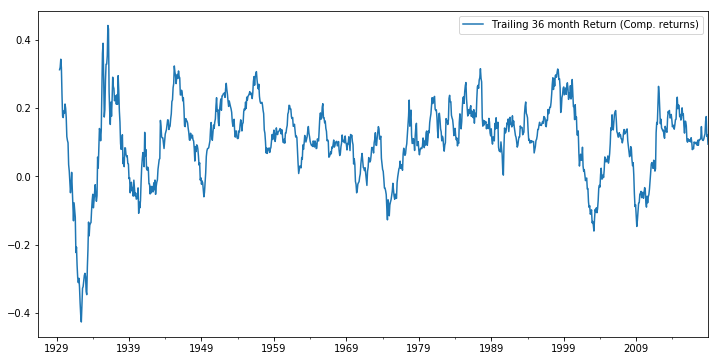

In [82]:
tmi_tr36mrets.plot(figsize=(12,6), label="Trailing 36 month Return (Comp. returns)", legend=True)
## Lets add the total market return as well
#total_market_return.plot(figsize=(12,6), label="Returns of the Total Market Index (Actual Returns)",legend=True)

#### A quick glance at the above plot of trailing 3 years annualized returns reveals that there are huge crashes in the time series from 1929 to 2018. 

##### A question we are gonna ask now is "Is there some relationship between these crashing periods and the correlation between all these industries?"

##### The way to answer this question is by measuring the average correlation across the industries in the TMI

##### From this we can observe if there is some sort of relationship between the avg corr that was observed over time and the returns that were observed from the overall market over time.

### Rolling correlation- along with MultiIndexes and .groupby()

In [83]:
ind_return.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [84]:
ts_corr=ind_return.rolling(window=36).corr()
ts_corr.tail() #gives time series of correlation matrix 

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

#### Note that the above result is different from the average correlation that you would normally get whenever you are writing code like "variable.corr()".

#### With "variable.corr()", the output you would get shall look like the above output from "ts_corr.tail()". Now, you might ask, "So, its basically the same?"
#### The answer is NO. What you see above is just 1 part of the entire output. To be more specific, it is the last part of the output thatsy the date is "2018-12". The final output has many such matrices starting all the way from "1926-07" till "2018-12". In other words, what you are getting as a final output from ts_corr is a time series of correlation matrices.

In [85]:
ts_corr.index.names=["Date","Industry"]

In [86]:
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
Date    Industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
Date    Industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
Date    Industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
Date    Industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

#### Another thing to note is that ts_corr gives out matrices with 2 indexes. If you look at the output, you will see that there is a Date index and then Industry index. 

#### What this is saying is that "In the last 36 months leading up to 2018-12, the Wholesale industry had a correlation of 47% with Food industry".

#### Now that everything is perfectly laid out, this leads us perfectly on the way to out final step. We shall be computing a time series of average trailing 36 month correlations among the 30 industries.

### First step

Group all of the industries by dates

code:
ts_corr.groupby(level ="Date")

### Second step

We will now apply a function on the Df resulted from step 1.  

code: ts_corr.groupby(level ="Date").apply(lambda cormat:cormat.values.mean())

In [88]:
ind_tr36corr=ts_corr.groupby(level ="Date").apply(lambda cormat:cormat.values.mean())

In [90]:
ind_tr36corr.tail()

Date
2018-08    0.416673
2018-09    0.401186
2018-10    0.409397
2018-11    0.403975
2018-12    0.479502
Freq: M, dtype: float64

#### Here again, lets clarify the result before we move on. The value that we get on "2018-12" is 47 %. This means that the average trailing 36 month correlations, leading up to 2018-12, between the 30 industries was 47%. 

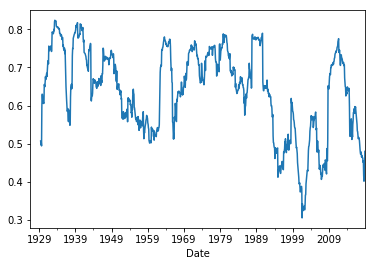

In [91]:
ind_tr36corr.plot()

#### Lets now plot both the trailing 36 month avg correlations and the trailing 36 month avg returns of the total market

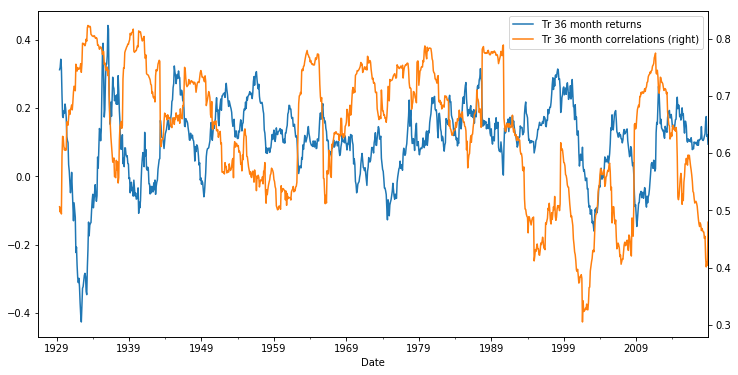

In [96]:
tmi_tr36mrets.plot(label="Tr 36 month returns", figsize=(12,6), legend=True)
ind_tr36corr.plot(label="Tr 36 month correlations", figsize=(12,6), legend=True, secondary_y=True)

#### Explanation time:

#### As you can see in the above plot, the x-axis represents the Date. However, there are two y-axis namely trailing 36 month tmi returns (left) and trailing 36 months correlations(right).

#### So, what do we see in the plot?

#### The correlation breaks down exactly when we need it the most. As can be clearly seen, whenever the market has a huge drawdown/correction, the correlation between the industries spikes up.

#### This is the limits of diversification. 

#### Can we zoom in a bit? Lets just look at the year 2007 onwards:

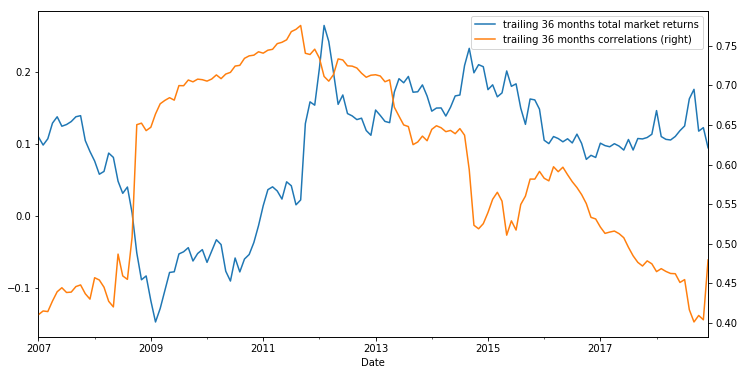

In [97]:
tmi_tr36mrets["2007":].plot(label="trailing 36 months total market returns", legend =True, figsize=(12,6))
ind_tr36corr["2007":].plot(label="trailing 36 months correlations", legend=True, secondary_y=True)